## H·ªçc ph·∫ßn: Th·ªã gi√°c m√°y t√≠nh
#### Nh√≥m 9: 
- Tr·ªãnh Qu·ªëc D√¢n - 22E1020014
- L√™ Qu√Ω Minh Quang - 22E1020007
- Ph·∫°m Ph∆∞·ªõc B·∫£o T√≠n - 22E1020021

## M√¥ t·∫£ d·ªØ li·ªáu
- B·ªô d·ªØ li·ªáu v·ªÅ ph√¢n lo·∫°i "Shoe", "Sandal", "Boot". Ngu·ªìn d·ªØ li·ªáu : Kaggle ([Shoe vs Sandal vs Boot Image Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images?fbclid=IwZXh0bgNhZW0CMTEAAR4Qhm5prfJKpfYH3kwbWi-Tcsk1Q1AHnBqh4scpOWhT4CTERDLwisuTuvNcDg_aem_8fGVUmMtZuHu_Cmj3jxaCg)).
- Ba l·ªõp 3 th∆∞ m·ª•c ri√™ng, m·ªói th∆∞ m·ª•c 5000 ·∫£nh.


## Chu·∫©n b·ªã d·ªØ li·ªáu

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd
IMG_SIZE = 120  # resize ·∫£nh k√≠ch th∆∞·ªõc 120x120

X = []
y = []

img_size = (120, 120)
data_dir =r"D:\datasets\ShoeSandalBoot"
classes = ["Shoe", "Sandal", "Boot"]
for label, c in enumerate(classes):
    folder = os.path.join(data_dir, c)
    for img_file in os.listdir(folder)[:200]:  # l·∫•y 50 ·∫£nh cho nh·∫π
        img = load_img(os.path.join(folder, img_file), target_size=img_size)
        arr = img_to_array(img).flatten() / 255.0
        X.append(arr)
        y.append(c)  # d√πng t√™n class thay v√¨ s·ªë cho d·ªÖ ƒë·ªçc

X = np.array(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_2d, columns=["Feature 1", "Feature 2"])
df["Target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Feature 1", y="Feature 2",
    hue="Target", palette="tab10", legend="full", s=70
)
plt.title("Shoes vs Sandal vs Boot (PCA 2D Projection)")
plt.grid(True)
plt.show()


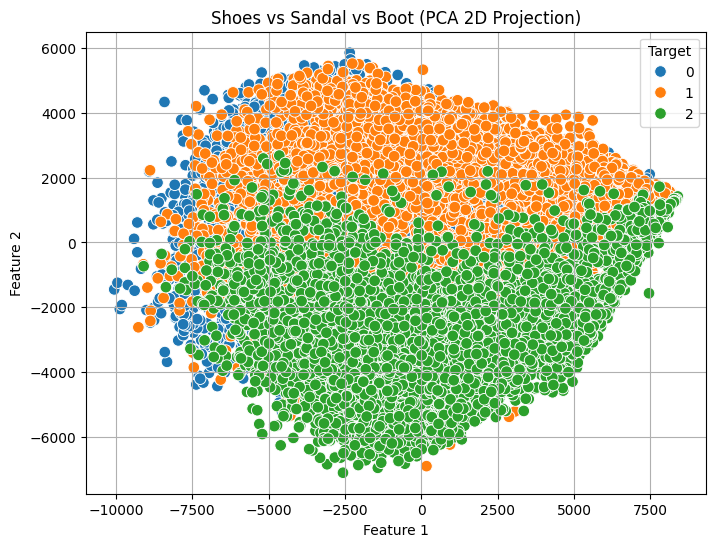

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

df = pd.DataFrame(X_2d, columns=["Feature 1", "Feature 2"])
df["Target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Feature 1", y="Feature 2",
    hue="Target", palette="tab10", legend="full", s=70
)
plt.title("Shoes vs Sandal vs Boot (PCA 2D Projection)")
plt.grid(True)
plt.show()

## Theo d√µi k 

k=1, Accuracy=0.9043
k=3, Accuracy=0.9003
k=5, Accuracy=0.8933
k=7, Accuracy=0.8877
k=9, Accuracy=0.8827


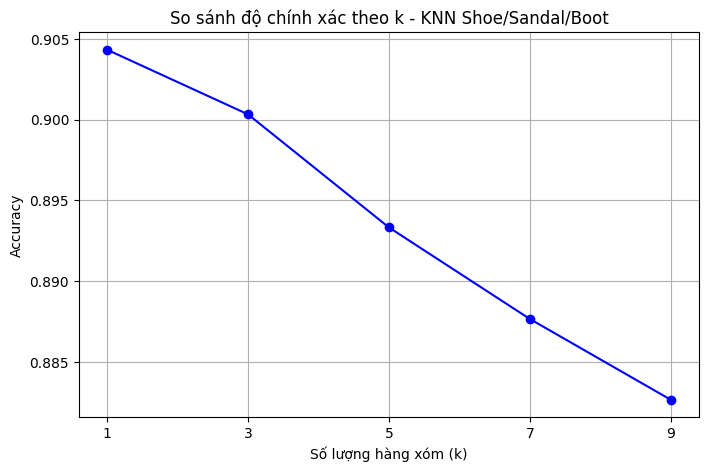

In [ ]:
# 3. So s√°nh accuracy theo k
# ======================
k_values = range(1, 10, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean", weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.xticks(k_values)
plt.xlabel("S·ªë l∆∞·ª£ng h√†ng x√≥m (k)")
plt.ylabel("Accuracy")
plt.title("So s√°nh ƒë·ªô ch√≠nh x√°c theo k - KNN Shoe/Sandal/Boot")
plt.grid(True)
plt.show()


Ch·ªçn k (t·ª´ k·∫øt qu·∫£ th·ª≠ nghi·ªám tr√™n)

In [35]:
# ======================
# 3. Hu·∫•n luy·ªán KNN
# ======================
k=3
knn_k = KNeighborsClassifier(n_neighbors=k,metric="euclidean",weights='distance')
knn_k.fit(X_train, y_train)

# ======================
# 4. ƒê√°nh gi√° m√¥ h√¨nh
# ======================
y_pred = knn_k.predict(X_test)

print("üîπ Accuracy:", accuracy_score(y_test, y_pred))
print("\nüîπ Classification Report:\n", classification_report(y_test, y_pred, target_names=classes))



üîπ Accuracy: 0.9043333333333333

üîπ Classification Report:
               precision    recall  f1-score   support

        Shoe       0.90      0.93      0.91      1000
      Sandal       0.96      0.80      0.87      1000
        Boot       0.87      0.99      0.93      1000

    accuracy                           0.90      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.91      0.90      0.90      3000



V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n v·ªõi K ƒë√£ ch·ªçn

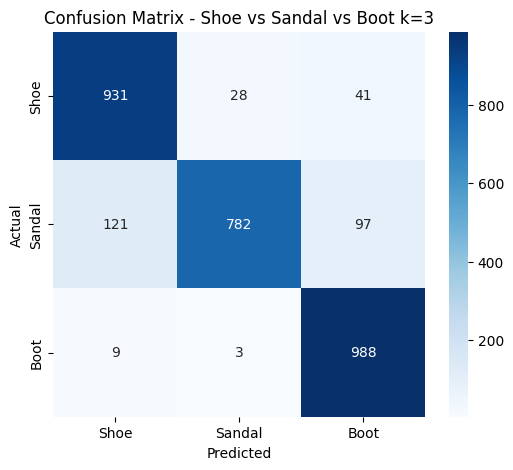

In [34]:
# 5. Ma tr·∫≠n nh·∫ßm l·∫´n
# ======================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Shoe vs Sandal vs Boot k={k}")
plt.show()


## D·ª± ƒëo√°n ph√¢n lo·∫°i

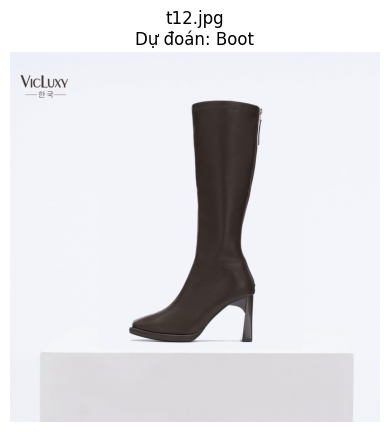

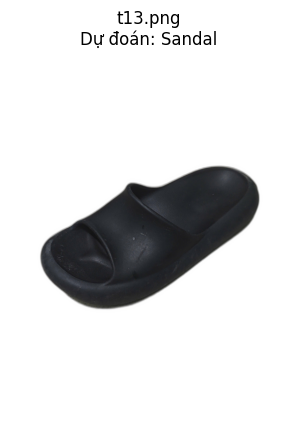

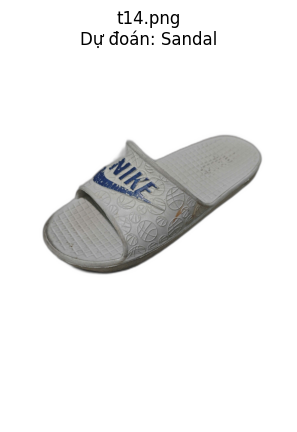

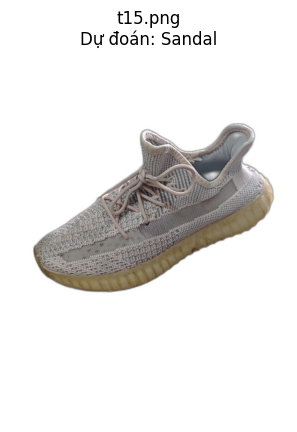

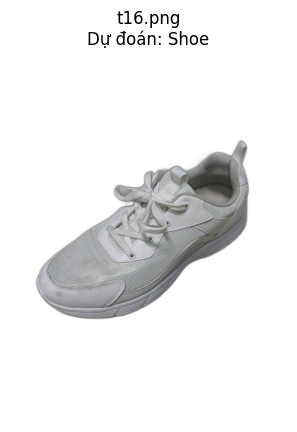

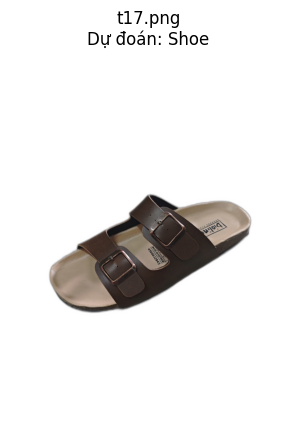

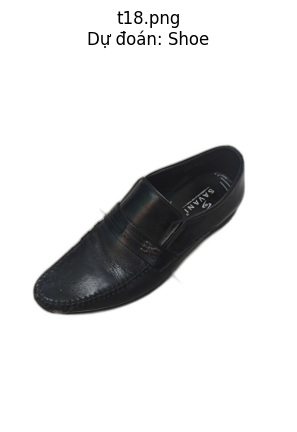

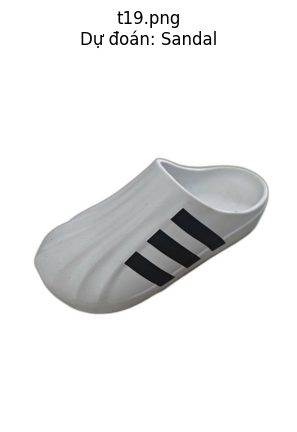

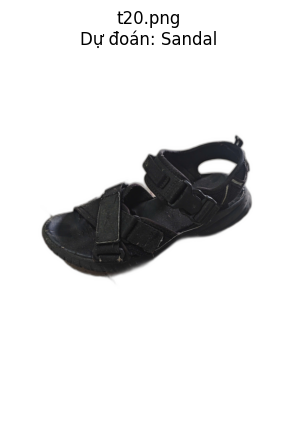

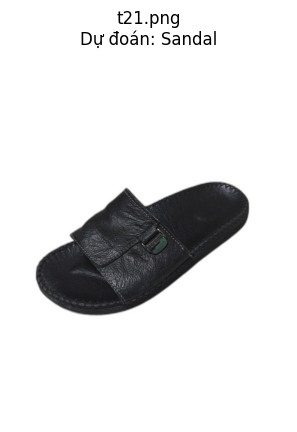

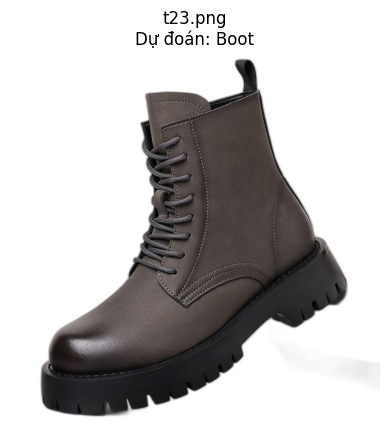

In [39]:
import os
def predict_folder(folder_path, limit=10):
    results = []
    count = 0
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        # ·∫¢nh g·ªëc ƒë·ªÉ hi·ªÉn th·ªã (gi·ªØ nguy√™n m√†u v√† k√≠ch th∆∞·ªõc)
        img_original = cv2.imread(img_path)
        if img_original is None:
            continue
        img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) 

        # ·∫¢nh x·ª≠ l√Ω ƒë·ªÉ d·ª± ƒëo√°n
        img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))
        img_flat = img_resized.flatten().reshape(1, -1)
        img_scaled = scaler.transform(img_flat)
        prediction = knn_k.predict(img_scaled)[0]

        results.append((filename, classes[prediction]))

        # Hi·ªÉn th·ªã ·∫£nh g·ªëc + nh√£n d·ª± ƒëo√°n
        plt.imshow(img_rgb)
        plt.title(f"{filename}\nD·ª± ƒëo√°n: {classes[prediction]}")
        plt.axis("off")
        plt.show()

        # print(f"{filename} ‚Üí {classes[prediction]}")

        count += 1
        if limit and count >= limit:  # gi·ªõi h·∫°n s·ªë ·∫£nh hi·ªÉn th·ªã
            break
    
    return results

# V√≠ d·ª•: d·ª± ƒëo√°n to√†n b·ªô ·∫£nh trong th∆∞ m·ª•c test
test_dir = r"D:\datasets\test_dan"
results = predict_folder(test_dir, limit=18)  # hi·ªÉn th·ªã th·ª≠ 5 ·∫£nh ƒë·∫ßu
